In [1]:
from ztfimg import raw

***

Reminder, the structure of the ccd is:

- qid (per ccd):
    ```
    2 | 1
    —- -—
    3 | 4
    ```
    
- ccd:
    ```
    16 | 15 | 14 | 13
   ---- ---- ---- ----
    12 | 11 | 10 | 09
   ---- ---- ---- ----
    08 | 07 | 06 | 05
   ---- ---- ---- ----
    04 | 03 | 02 | 01
    ```

***
# 1. Single RawImage

Here a bias image


Raw images are stored by CCD, they contain 8 fitscards: the 4 quadrants and their associated overscan.

In [2]:

filename = "/sps/ztf/data/raw/2019/0321/080278/ztf_20190321080278_000000_bi_c01_b.fits.fz"


## 1.1 Load a Image (CCD)

Raw images are stored by CCD, they contain 8 fitscards: the 4 quadrants and their associated overscan.


In [3]:
ccd = raw.RawCCD.from_filename(filename, use_dask=False)

<AxesSubplot:>

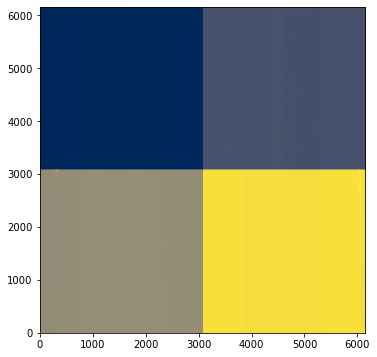

In [4]:
ccd.show()

The data are in get_data()

In [5]:
ccddata = ccd.get_data()

In [6]:
ccddata

array([[ 76.77372 ,  72.35263 ,  74.79438 , ..., 101.471634, 102.49419 ,
        102.24525 ],
       [ 74.53334 ,  74.02369 ,  74.10705 , ..., 100.23911 , 100.72614 ,
         99.90418 ],
       [ 74.97867 ,  74.10745 ,  71.1462  , ...,  99.60247 , 104.94037 ,
        100.09302 ],
       ...,
       [ 29.107496,  32.465786,  31.507856, ...,  49.400314,  50.156147,
         49.704174],
       [ 30.320675,  31.159945,  30.436367, ...,  47.697964,  47.606083,
         47.66312 ],
       [ 30.420633,  28.831194,  32.466515, ...,  46.827007,  49.65808 ,
         49.894775]], dtype=float32)

## 1.2 Get a quadrant

### 1.2.2 get the quadrant from the ccd

If you want single quadrant, say the second quadrant `qid=2`, simply do

In [7]:
quadrant = ccd.get_quadrant(qid=2)

<AxesSubplot:>

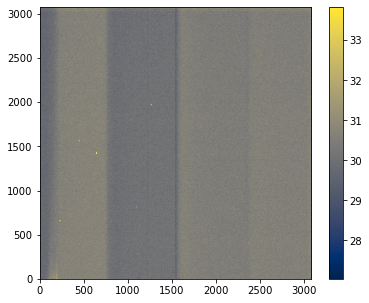

In [8]:
quadrant.show()

In [10]:
qdata= quadrant.get_data()
qdata

array([[28.621006, 30.241604, 28.702477, ..., 31.401697, 32.289265,
        33.50807 ],
       [28.782917, 29.281803, 29.20761 , ..., 32.663418, 29.390446,
        32.024605],
       [29.947992, 28.961554, 30.409239, ..., 31.591208, 30.982576,
        29.605827],
       ...,
       [29.107496, 32.465786, 31.507856, ..., 30.991531, 32.490448,
        33.93162 ],
       [30.320675, 31.159945, 30.436367, ..., 30.345184, 32.704147,
        31.674976],
       [30.420633, 28.831194, 32.466515, ..., 29.849957, 28.128614,
        32.88631 ]], dtype=float32)

### 1.2.1 directly load a quadrant

In [11]:
quadrant = raw.RawQuadrant.from_filename(filename, qid=2, use_dask=False)

<AxesSubplot:>

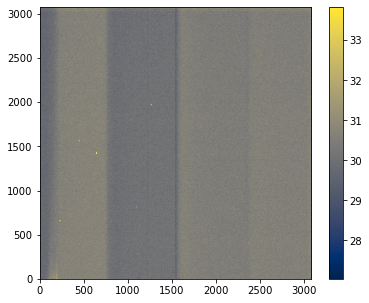

In [12]:
quadrant.show()

## 1.2 The Overscan

The overscan are related to the readout channel (so the quadrant). There are thuse attached to the quadrant object

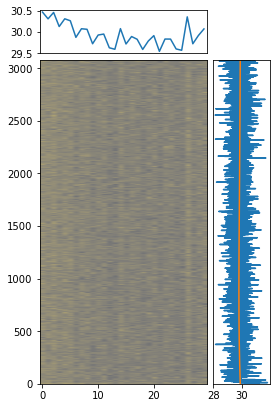

In [13]:
quadrant.show_overscan()

To get the overscan correction (orange model on the top figure)

In [14]:
overscan_corr = quadrant.get_overscan(which="model", # default is 'data'
                                      userange=[10, 20], stackstat='nanmedian', modeldegree=5) # all those are default

To correct the data from the overscan, you should do `rawdata-overscan_corr`. This is directly accessible from the `get_data()` method

In [15]:
data = quadrant.get_data(corr_overscan=True, corr_nl=True)

In [16]:
data

array([[-1.2464025 ,  0.3741248 , -1.1649339 , ...,  1.5341609 ,
         2.4216826 ,  3.6404326 ],
       [-1.0844623 , -0.58559906, -0.6597911 , ...,  2.7958555 ,
        -0.4769622 ,  2.157073  ],
       [ 0.08059642, -0.90579844,  0.54182196, ...,  1.7237315 ,
         1.1151309 , -0.26155332],
       ...,
       [-0.76289535,  2.5952342 ,  1.6373541 , ...,  1.1210539 ,
         2.6198962 ,  4.0609975 ],
       [ 0.44996646,  1.2891979 ,  0.565651  , ...,  0.47447398,
         2.8333225 ,  1.8042011 ],
       [ 0.5496591 , -1.0397078 ,  2.5954392 , ..., -0.02099292,
        -1.7422587 ,  3.015216  ]], dtype=float32)

# 1.3 get_data at the CCD level

the ccd.get_data() method calls down to the individual quandrants get_data() and combine then together given the quandrant structure.

In [17]:
ccddata = ccd.get_data(corr_overscan=True, corr_nl=True)

In [18]:
ccddata

array([[ 4.54167   ,  0.12096969,  2.5625057 , ...,  1.3031478 ,
         2.3255553 ,  2.0766463 ],
       [ 2.302603  ,  1.7929976 ,  1.8763487 , ...,  0.07149403,
         0.5584554 , -0.26337537],
       [ 2.7490044 ,  1.8778648 , -1.0831261 , ..., -0.56435907,
         4.7727456 , -0.07388815],
       ...,
       [-0.76289535,  2.5952342 ,  1.6373541 , ...,  1.6737604 ,
         2.4295397 ,  1.9775972 ],
       [ 0.44996646,  1.2891979 ,  0.565651  , ..., -0.02940855,
        -0.12128171, -0.06425199],
       [ 0.5496591 , -1.0397078 ,  2.5954392 , ..., -0.90124637,
         1.9296215 ,  2.166293  ]], dtype=float32)

## 1.4 “`Dask`ing”

Dask is supported inside the individual quadrants / ccd. The `use_dask=True` is made while loading the object. Then the data won't be `numpy.array` by `dask.array`. This is particularly useful if you have many quadrant opens at once. 

All the method work just the same

In [19]:
from dask.distributed import Client
client = Client()

In [21]:
ccddasked = raw.RawCCD.from_filename(filename, use_dask=True)

In [22]:
darray = ccddasked.get_data(corr_overscan=True, corr_nl=True)
darray

dask.array<concatenate, shape=(6160, 6144), dtype=float64, chunksize=(3080, 3072), chunktype=numpy.ndarray>

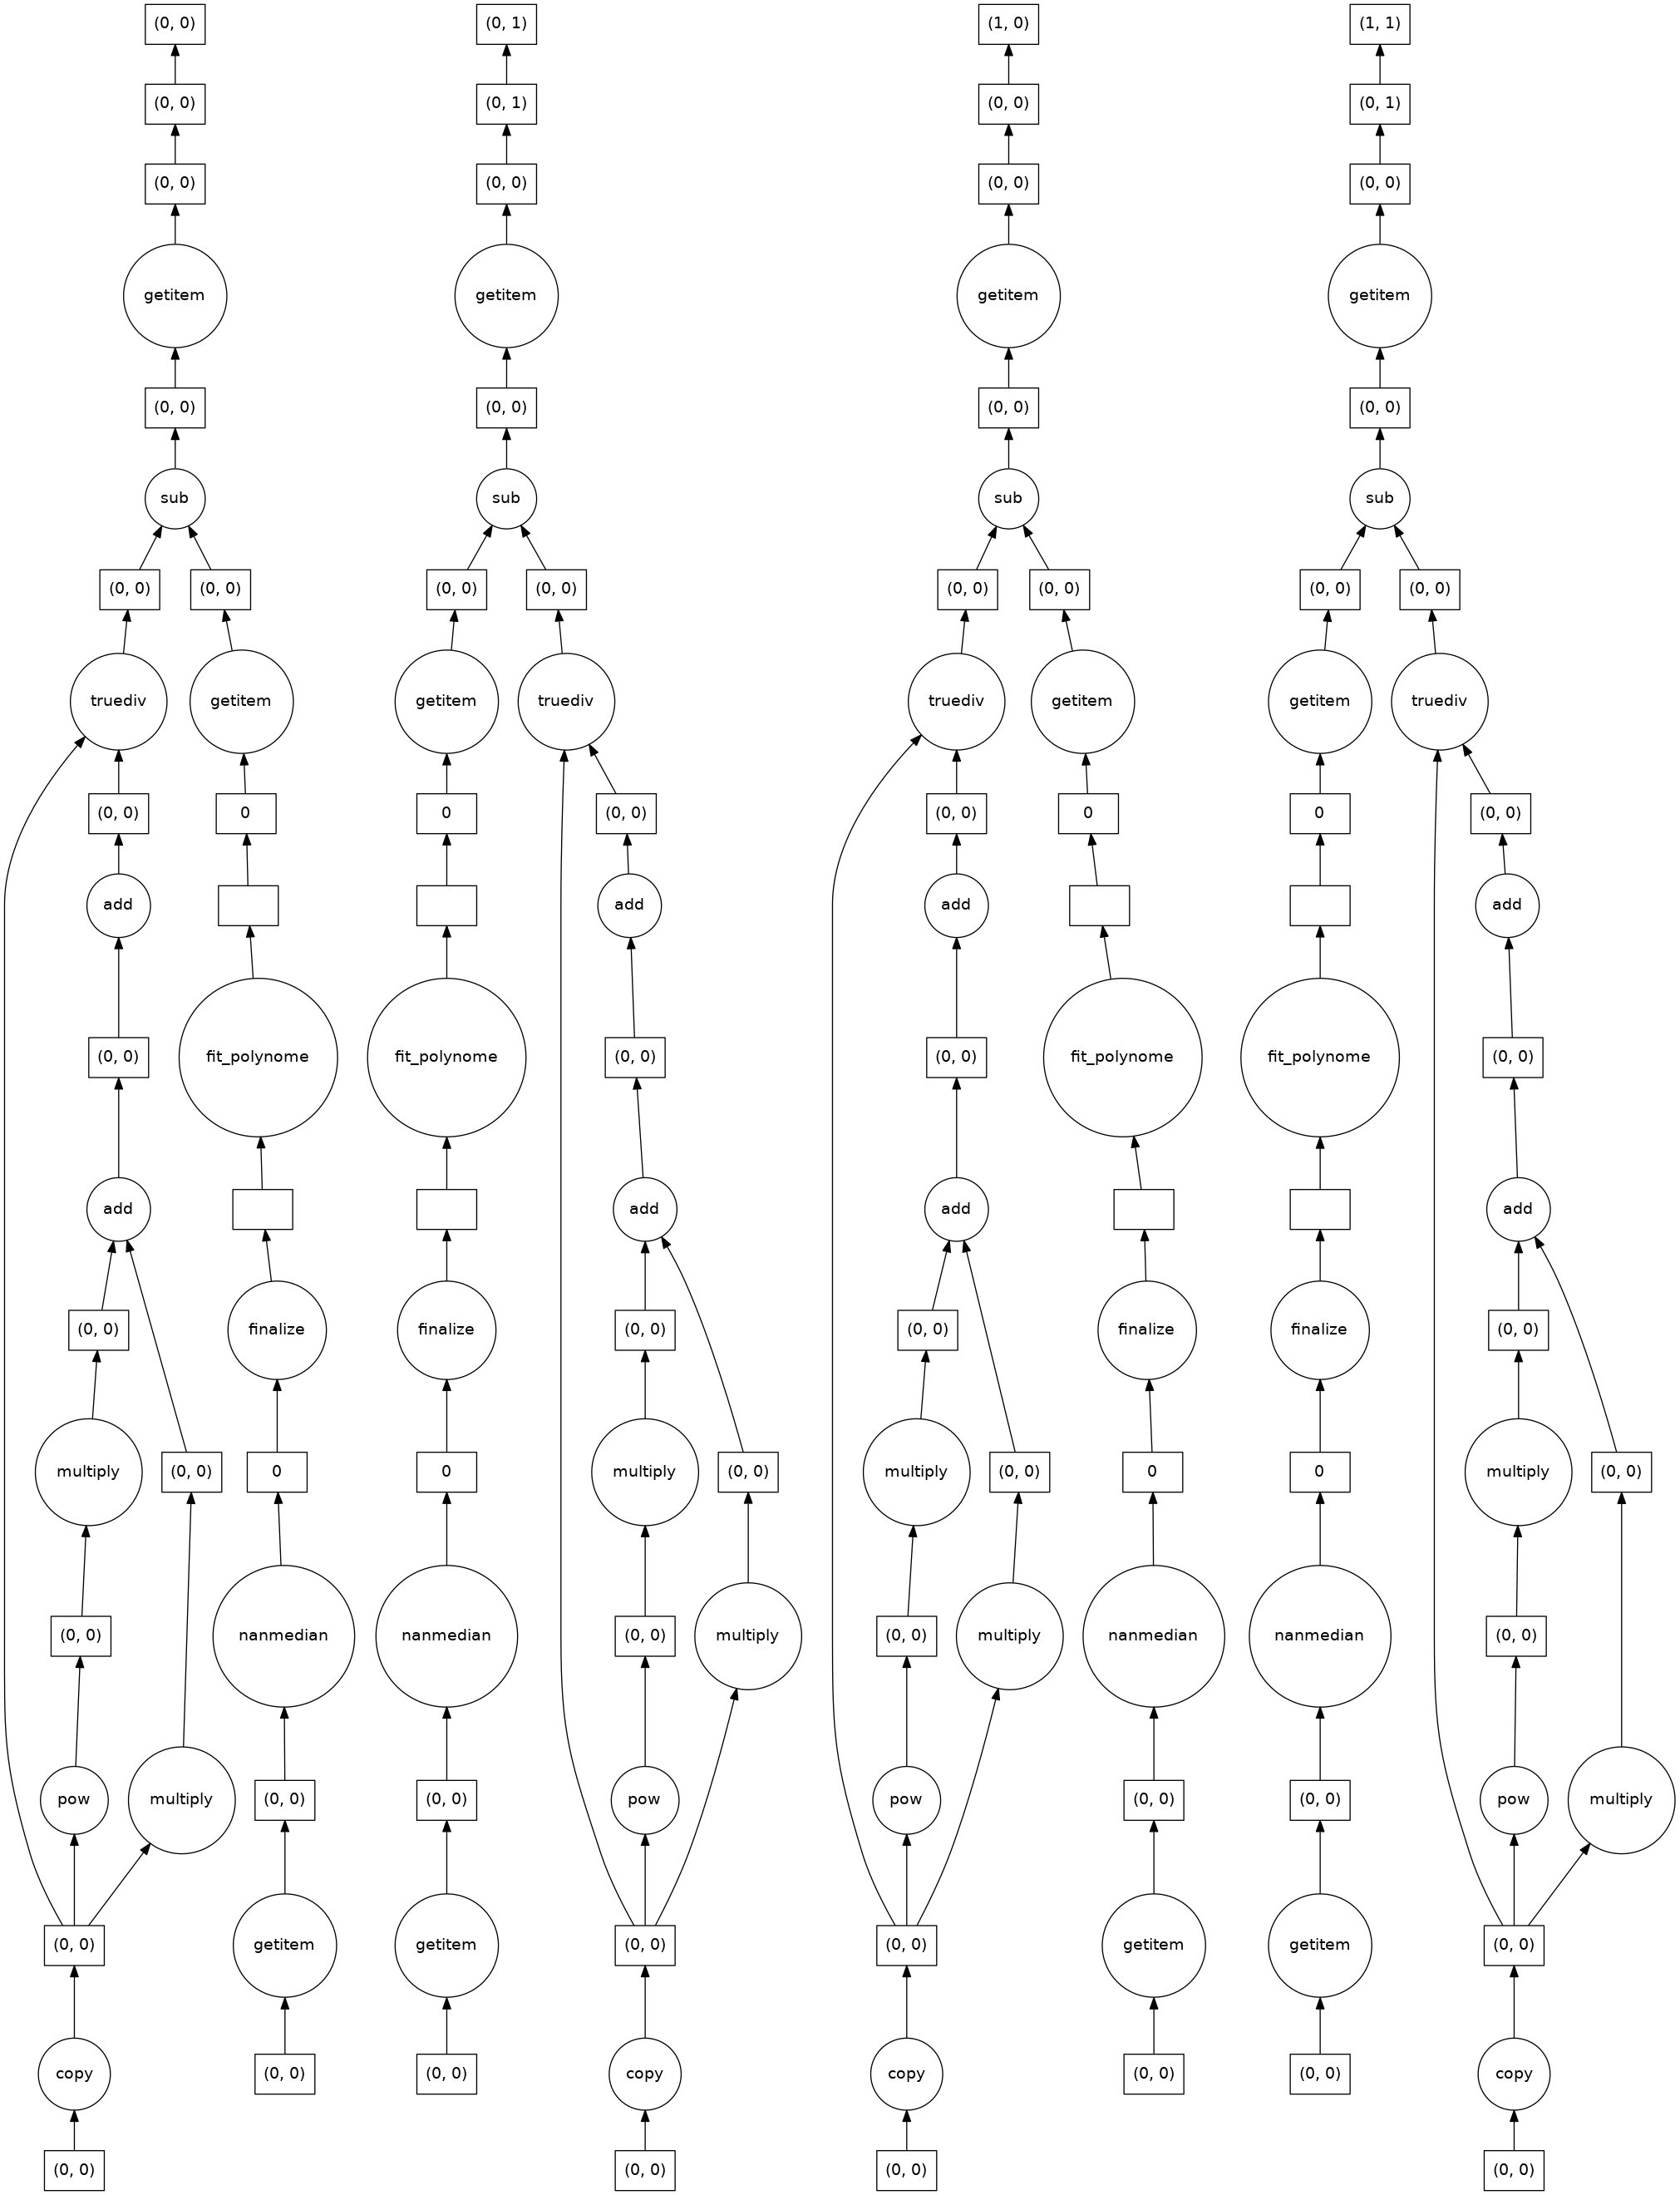

In [23]:
darray.visualize() 
# check the structure. 4 colonnes for the 4 quadrants and inside the overscan correction (sub-branch with fit_polynome)

In [24]:
ccddata = darray.compute() # check you dask dashboard

In [25]:
ccddata

array([[ 4.54166976,  0.12096969,  2.56250564, ...,  1.30314782,
         2.32555536,  2.07664636],
       [ 2.30260303,  1.79299762,  1.87634876, ...,  0.07149403,
         0.55845539, -0.26337536],
       [ 2.7490044 ,  1.87786487, -1.08312604, ..., -0.56435904,
         4.77274576, -0.07388816],
       ...,
       [-0.76289534,  2.59523417,  1.63735415, ...,  1.67376043,
         2.42953969,  1.97759725],
       [ 0.44996647,  1.28919796,  0.56565098, ..., -0.02940855,
        -0.12128172, -0.06425199],
       [ 0.54965909, -1.03970782,  2.59543927, ..., -0.90124636,
         1.92962141,  2.16629285]])

***
# 2. Multiple RawImage

Here let's use as example flats

In [26]:
from ztfin2p3 import io

In [29]:
rawflats_ledid4_14march2019 = io.get_rawfile("flat", "20190314", ledid=4, ccdid=4)
rawflats_ledid4_14march2019

['/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c04_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080787/ztf_20190314080787_000000_zg_c04_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/081053/ztf_20190314081053_000000_zg_c04_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/081308/ztf_20190314081308_000000_zg_c04_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/081562/ztf_20190314081562_000000_zg_c04_f.fits.fz']

## 2.1 RawCCDCollection 

We use dask for this example as it is the usual way to use ccdcollection since you are dealing with large dataset.

In [30]:
from ztfimg import raw

In [31]:
rawcol = raw.RawCCDCollection.from_filenames(rawflats_ledid4_14march2019, use_dask=True)

To get the data, simply do

In [33]:
datacube = rawcol.get_data(corr_overscan=True, corr_nl=True)
datacube

dask.array<stack, shape=(5, 6160, 6144), dtype=float64, chunksize=(1, 6160, 6144), chunktype=numpy.ndarray>

The individual headers are combined as a dataframe in

In [36]:
rawcol.headerdf

,0,1,2,3,4
npartitions=1,,,,,
,object,object,object,object,object
,...,...,...,...,...


It is suggested to use rawcol.get_headerdf() if you want to actual data. The persist option is pretty useful to speedup everything

In [39]:
rawcol.get_headerdf().compute()

,0,1,2,3,4
keys,,,,,
AIRMASS,10.156,10.156,10.156,10.156,10.156
AZIMUTH,148.7,148.7,148.7,148.7,148.7
BITPIX,-32,-32,-32,-32,-32
CCDNAME,S04,S04,S04,S04,S04
CCDSUM,1 1,1 1,1 1,1 1,1 1
...,...,...,...,...,...
TRACKRA,0.0,0.0,0.0,0.0,0.0
WETNESS,0.0,0.0,0.0,0.0,0.0
WINDDIR,58.0,48.0,37.0,99.0,62.0


### 2.2 get_data_mean() and “sigma-clipping”

Usually, CCDCollection is used to do the average mean of the data (you don't have to though). To do that, we have implemented `get_data_mean()`. Internally it rechunks the data as on should (per quadrant), though this is optional. 

`get_data_mean()` further has a sigma clipping option.

In [41]:
clippedmean = rawcol.get_data_mean(clipping=True, sigma=3)
clippedmean

dask.array<mean_agg-aggregate, shape=(6160, 6144), dtype=float64, chunksize=(3080, 3072), chunktype=numpy.ndarray>

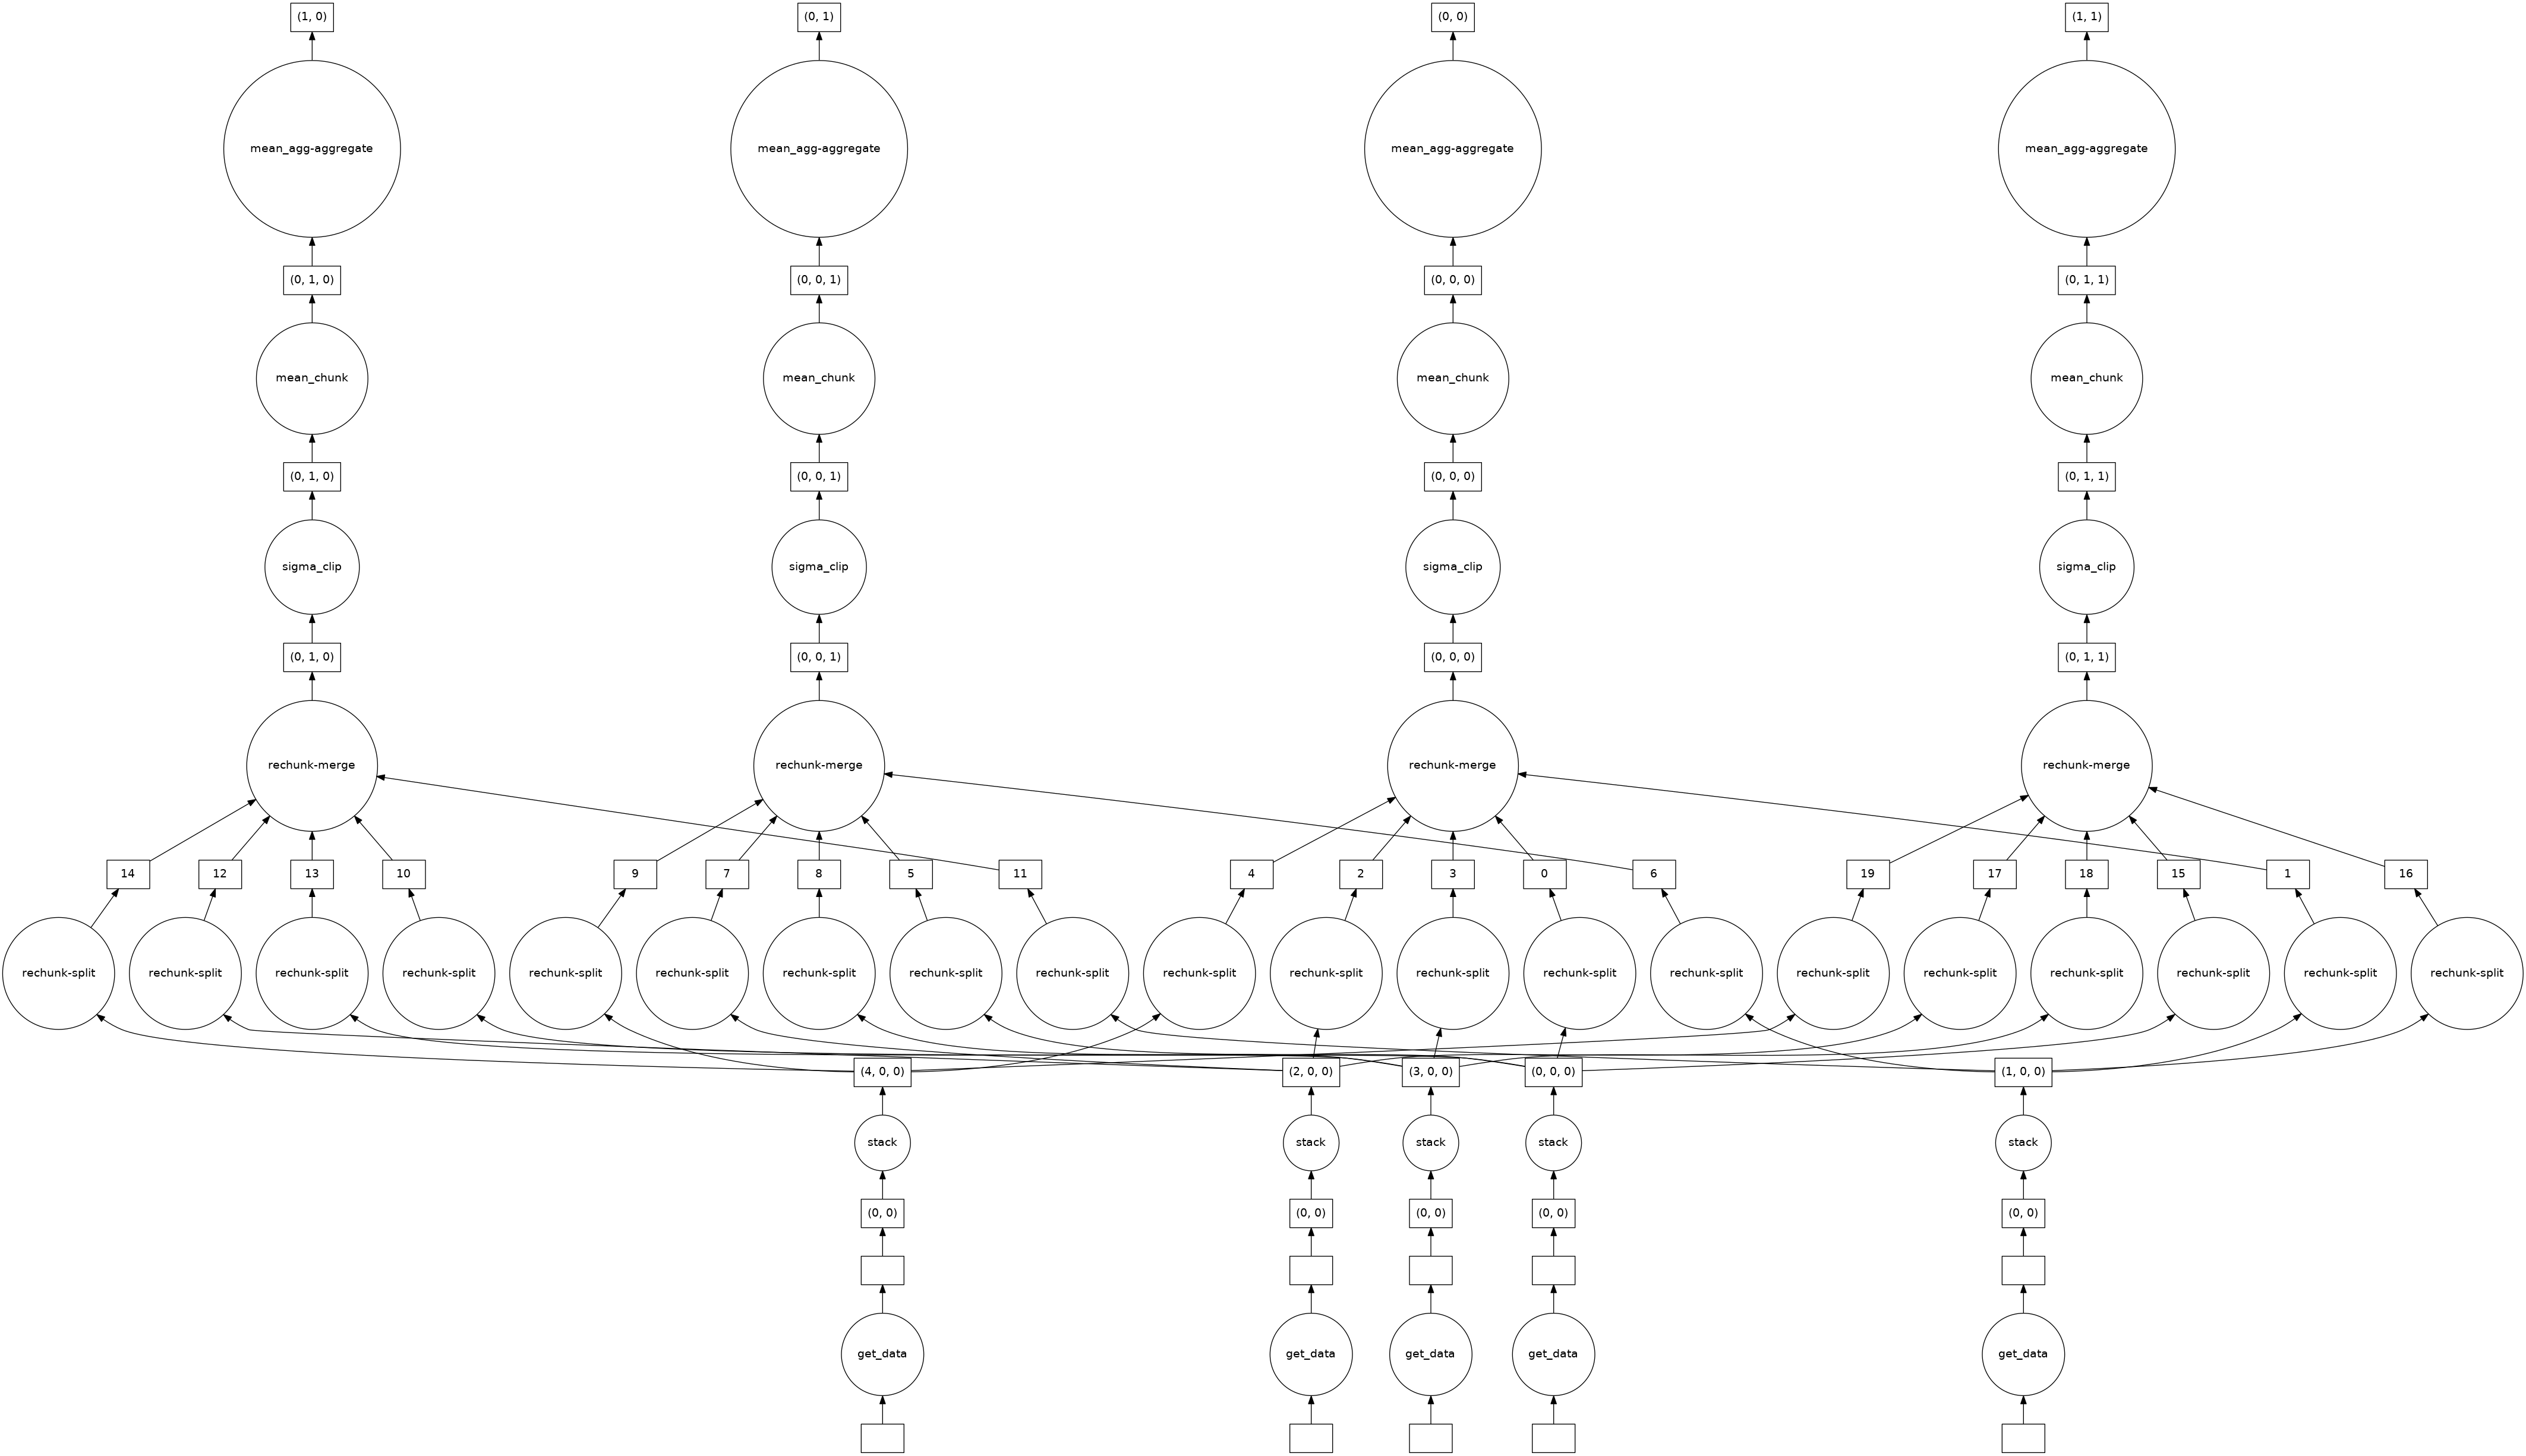

In [42]:
clippedmean.visualize()

In [43]:
clippedmean_computed = clippedmean.compute()
clippedmean_computed

array([[31559.74179688, 31932.71953125, 31919.09335938, ...,
        40416.8453125 , 40446.19296875, 40513.79296875],
       [30449.103125  , 31442.42539063, 31938.19921875, ...,
        42537.52890625, 42532.1703125 , 42416.26484375],
       [30395.95429687, 30619.48945312, 30669.03554687, ...,
        43343.12265625, 43516.484375  , 43018.77109375],
       ...,
       [42714.68515625, 42861.171875  , 42524.76171875, ...,
        43991.26640625, 43992.046875  , 44248.509375  ],
       [41282.20234375, 42248.35078125, 42191.9828125 , ...,
        42023.47265625, 42040.4546875 , 42283.0671875 ],
       [39966.40234375, 39966.68984375, 39961.90625   , ...,
        39815.33359375, 39814.8203125 , 39811.640625  ]])

***
# 3. RawFocal Plane

RawFocalPlane object is useful to vizualise what happens at the camera level. It expects as input the list of all the in raw ccd files. RawFocalPlane is basically a CCDCollection.

In [3]:
import dask
from dask_jobqueue import SGECluster
from dask.distributed import Client


cluster = SGECluster(name="dask-worker",  walltime="02:00:00", 
                     memory='5GB', death_timeout=120, 
                     log_directory="/sps/ztf/users/rigault/dask/logs",
                     local_directory='$TMPDIR',  # Location to put temporary data if necessary
                     project="P_ztf", resource_spec='sps=1', 
                     cores=1, processes=1)
cluster.scale(30)
client = Client(cluster)

/pbs/home/r/rigault/.local/lib/python3.8/site-packages/dask_jobqueue/core.py:19: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import format_bytes, parse_bytes, tmpfile
/pbs/home/r/rigault/.local/lib/python3.8/site-packages/dask_jobqueue/core.py:19: FutureWarning: parse_bytes is deprecated and will be removed in a future release. Please use dask.utils.parse_bytes instead.
  from distributed.utils import format_bytes, parse_bytes, tmpfile
/pbs/home/r/rigault/.local/lib/python3.8/site-packages/dask_jobqueue/core.py:19: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import format_bytes, parse_bytes, tmpfile
/pbs/home/r/rigault/.local/lib/python3.8/site-packages/dask_jobqueue/htcondor.py:6: FutureWarning: parse_bytes is deprecated and will be removed in a future release. Please use dask.utils

In [6]:
from ztfin2p3 import io

In [7]:
rawflats_ledid4_14march2019 = io.get_rawfile("flat", "20190314", ledid=4, ccdid=None)
rawflats_ledid4_14march2019

['/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c01_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c02_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c03_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c04_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c05_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c06_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c07_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c08_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c09_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c10_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c11_f.fits.fz',
 '/sps/ztf/data/raw/2019/0314/080532/ztf_20190314080532_000000_zg_c12_f.fits.fz',
 '/sps/ztf/data/

In [8]:
focalplane_files = [f for f in rawflats_ledid4_14march2019 if "20190314080532" in f]

In [9]:
fp = raw.RawFocalPlane.from_filenames(focalplane_files, use_dask=True)

<AxesSubplot:>

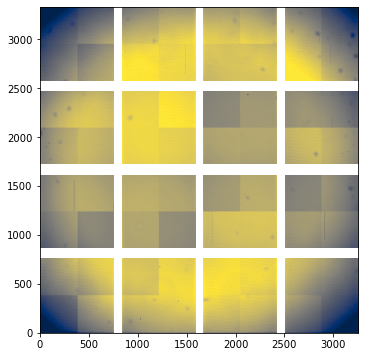

In [11]:
fp.show(rebin=8)

### from_filefracday() 

You can directly load the FocalPlane from `filefracday`  (ztfquery knows how to grab the files).

In [12]:
fp = raw.RawFocalPlane.from_filefracday("20190314080532", use_dask=True)

In [13]:
fp.get_data()

dask.array<concatenate, shape=(26656, 26040), dtype=float64, chunksize=(3080, 3072), chunktype=numpy.ndarray>